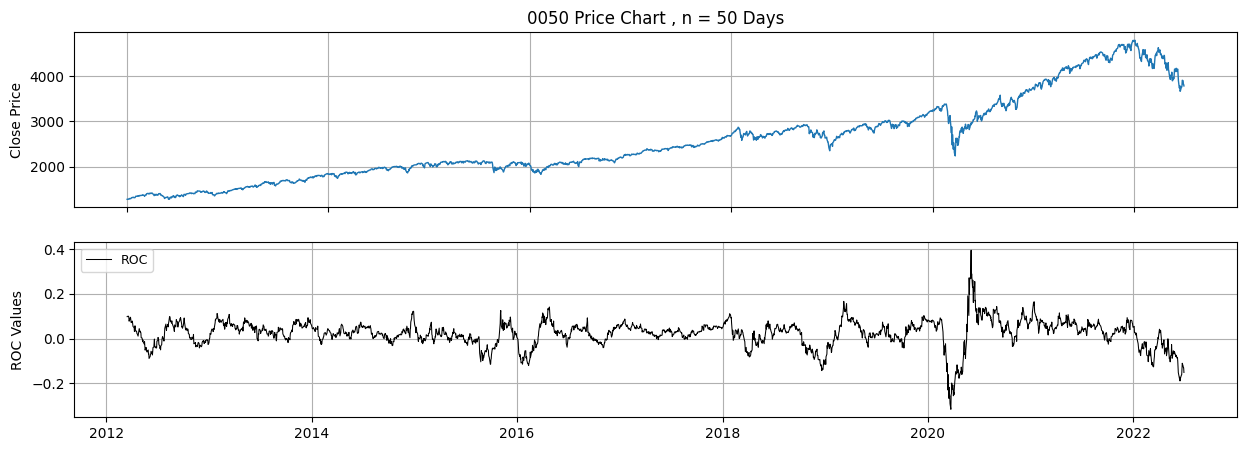

In [1]:

# import library modules
import pandas as pd
# import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

# Compute Roc


def ROC(data, n):
    N = data['Close'].diff(n)
    D = data['Close'].shift(n)
    ROC = pd.Series(N/D, name='Rate of Change')
    data = data.join(ROC)
    return data

date_0 = '2012-01-01'
date_1 = '2022-07-01'
data = yf.Ticker("^GSPC").history(start=date_0, end=date_1)
data = pd.DataFrame(data)

n = 50
ROC_Nifty = ROC(data, n)
ROC = ROC_Nifty['Rate of Change']

# represent them in chart
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'], lw=1)
plt.title('0050 Price Chart , n = 50 Days')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(ROC, 'k', lw=0.75, linestyle='-', label='ROC')
plt.legend(loc=2, prop={'size': 9})
plt.ylabel('ROC Values')
plt.grid(True)
# plt.setp(plt.gca().get_xticklabels(),rotation=30)
plt.show()


(array([   0,    1,    2, ..., 1293, 1294, 1295], dtype=int32),)


C:\Users\e4903\AppData\Local\Temp\ipykernel_2784\208507876.py:35: RuntimeWarning: divide by zero encountered in divide
  axes[1].plot(1/f[mask], abs(x_freqdom[mask]), label="x_freqdom")


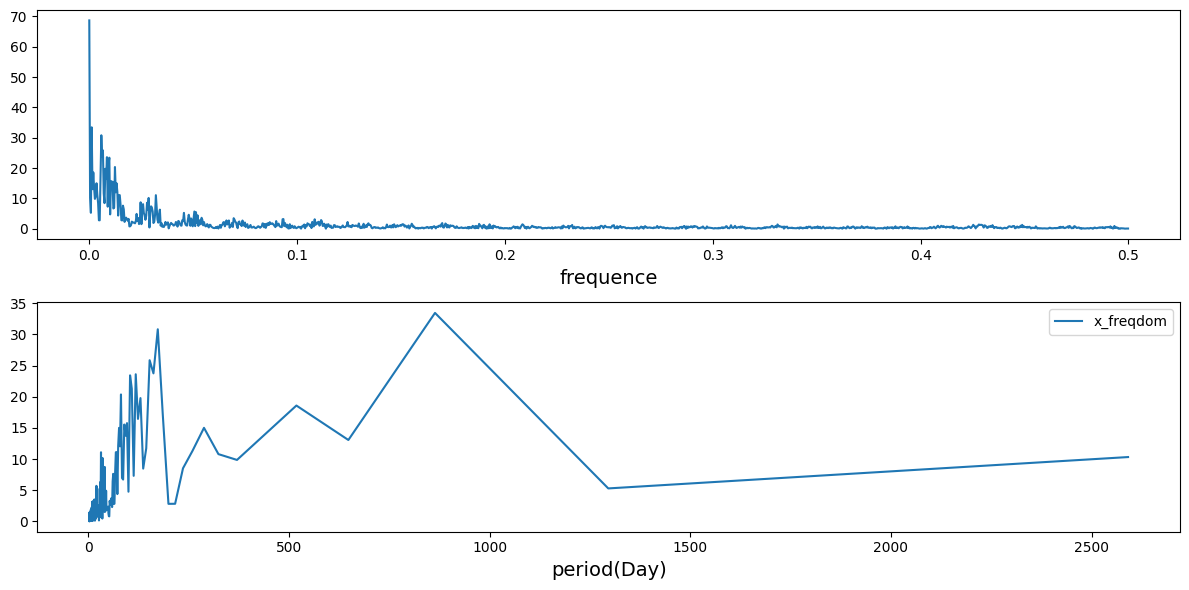

C:\Users\e4903\AppData\Local\Temp\ipykernel_2784\208507876.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  sig_period = 'Period : ' + str( 1/abs(f[i])) + '(Days)'


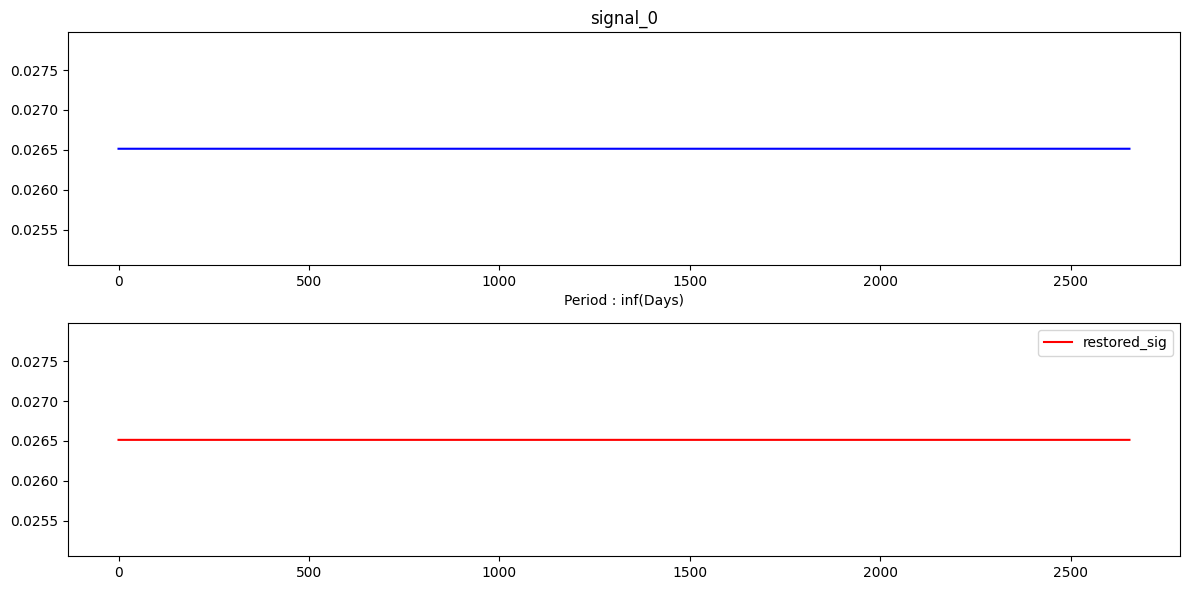

Period :  863.6666666666666 (Days)


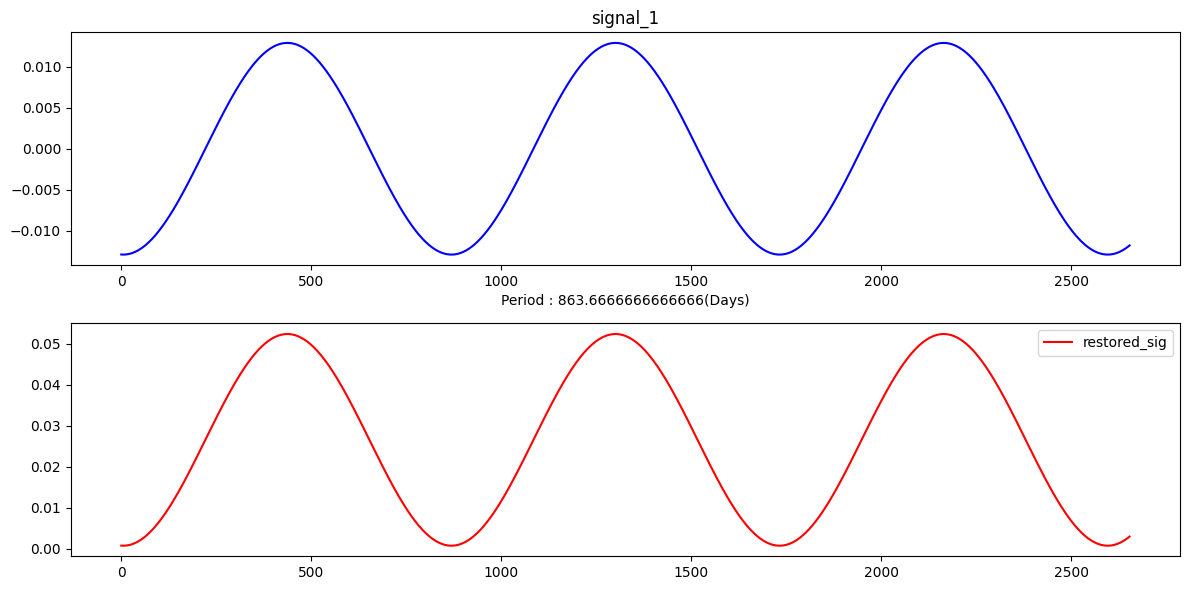

Period :  172.73333333333335 (Days)


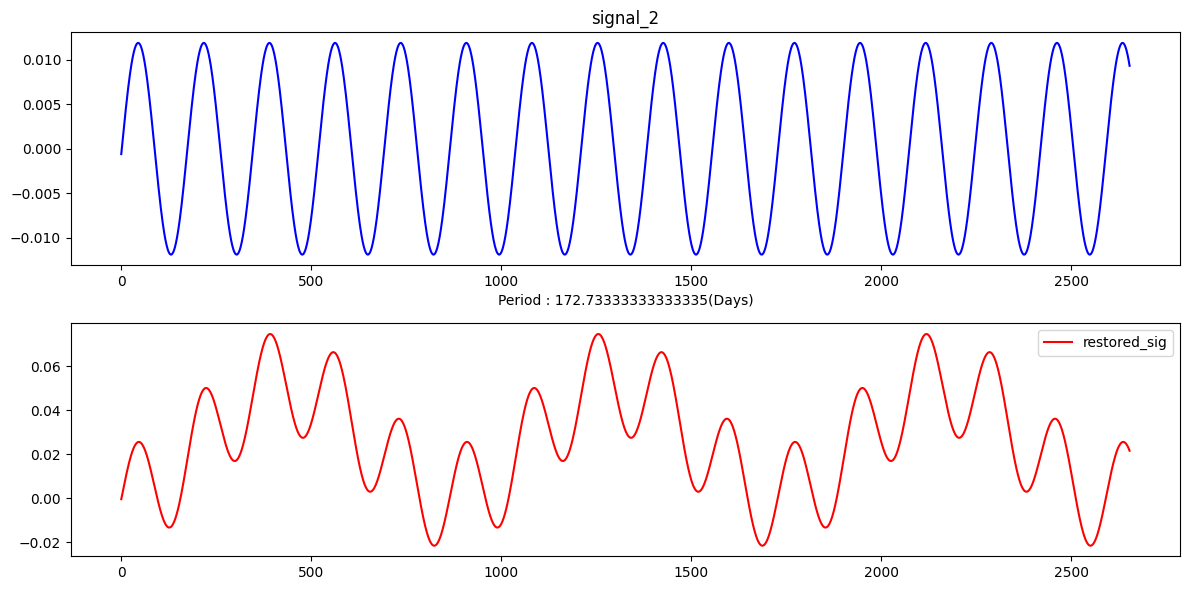

Period :  152.41176470588235 (Days)


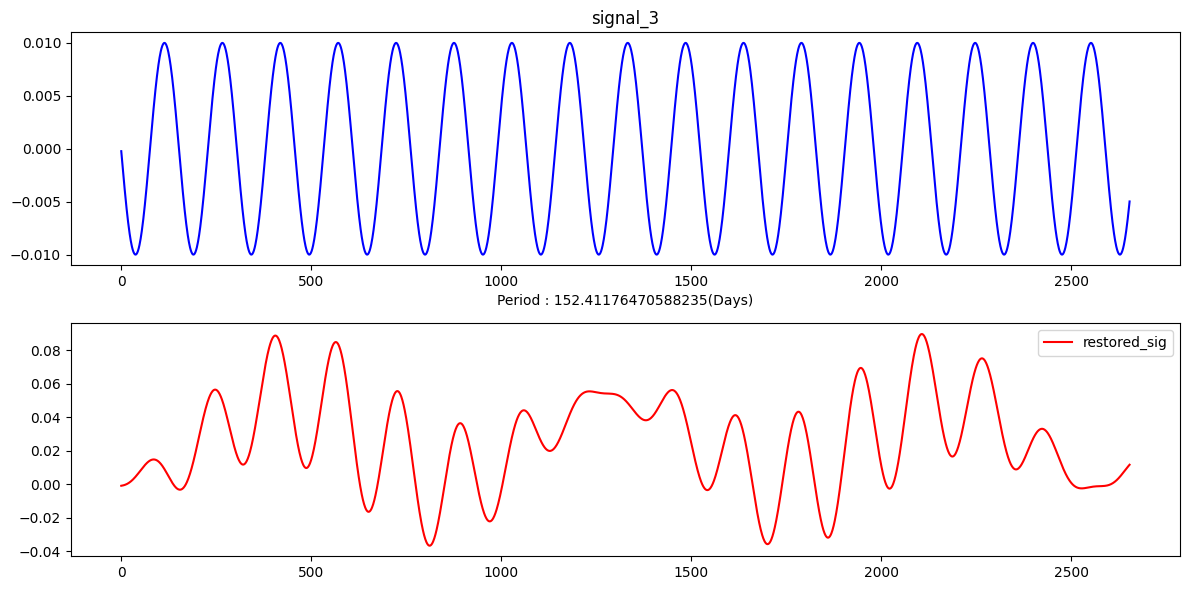

Period :  161.9375 (Days)


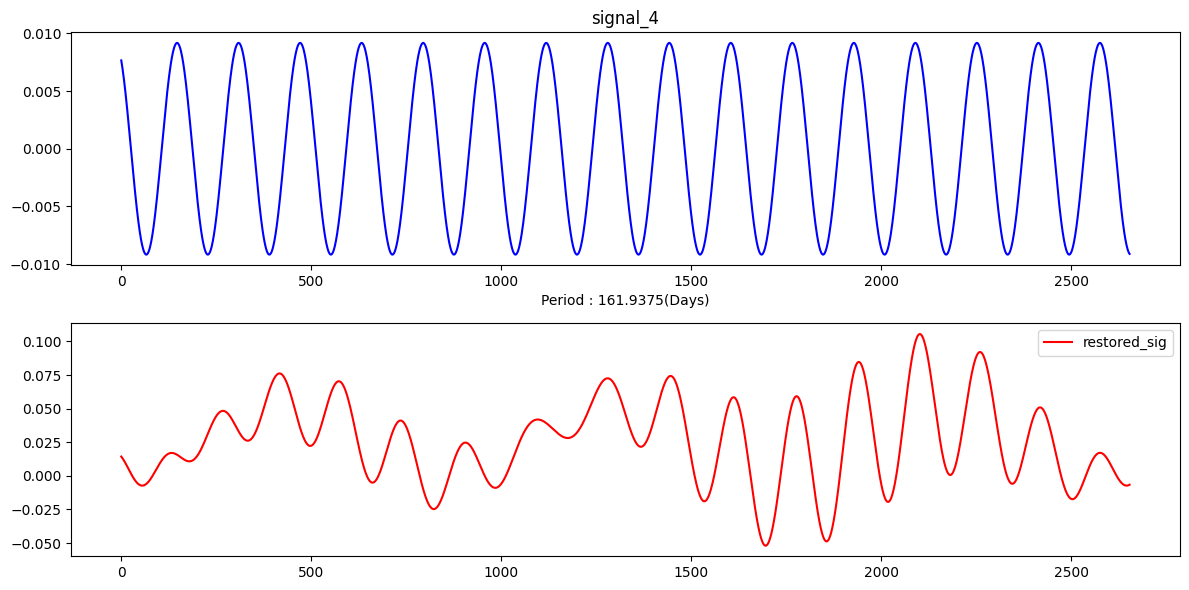

Period :  117.77272727272727 (Days)


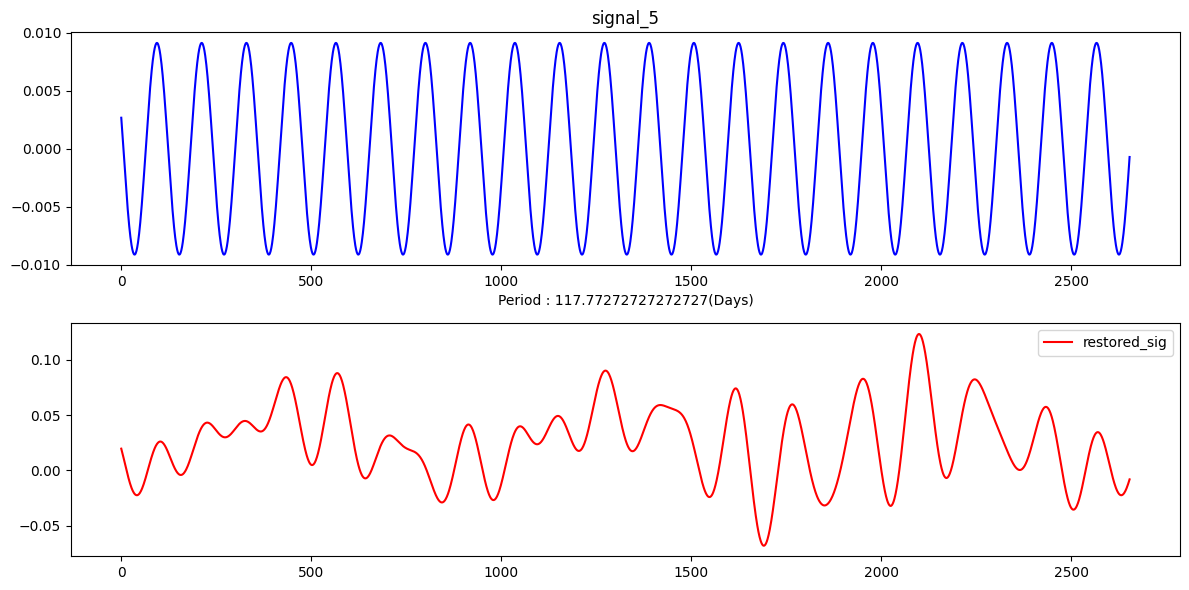

Period :  13.855614973262032 (Days)


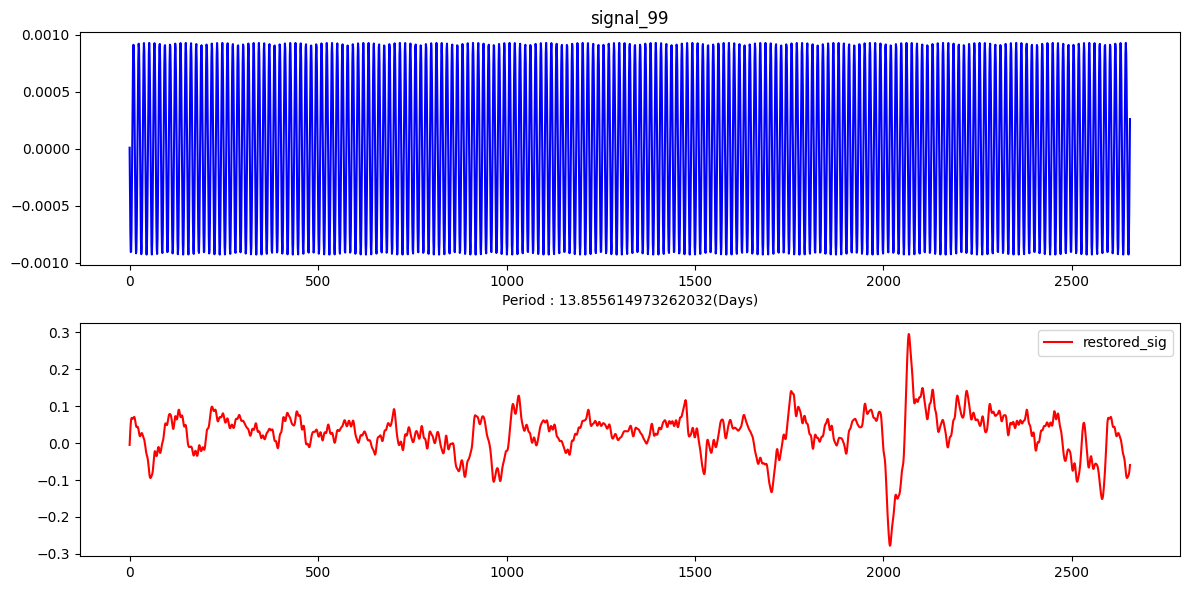

Period :  23.13392857142857 (Days)


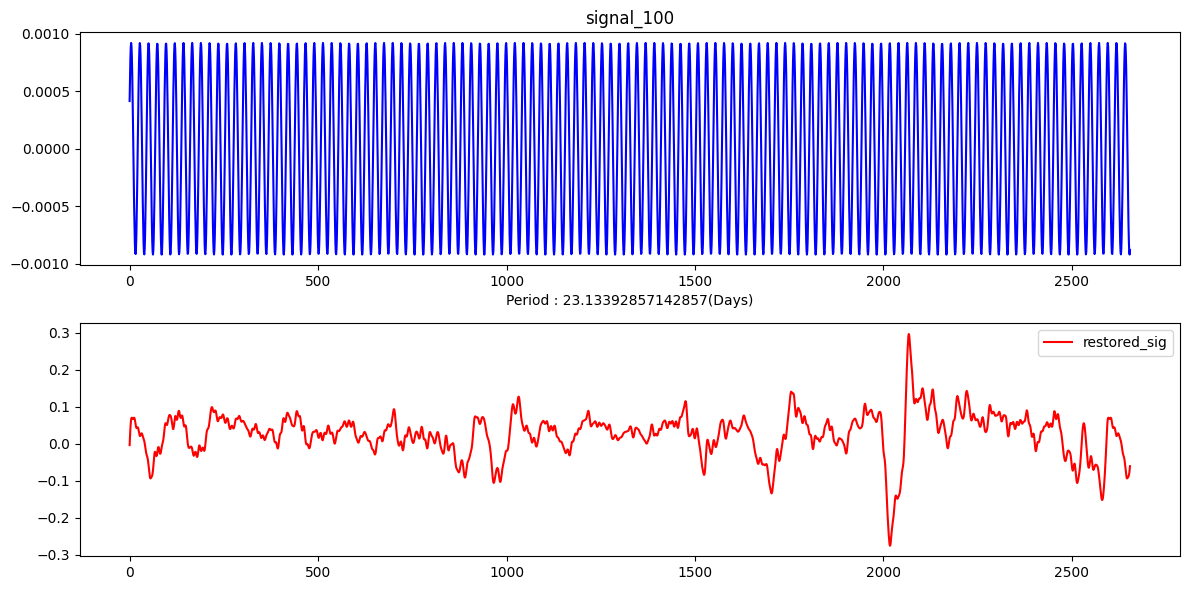

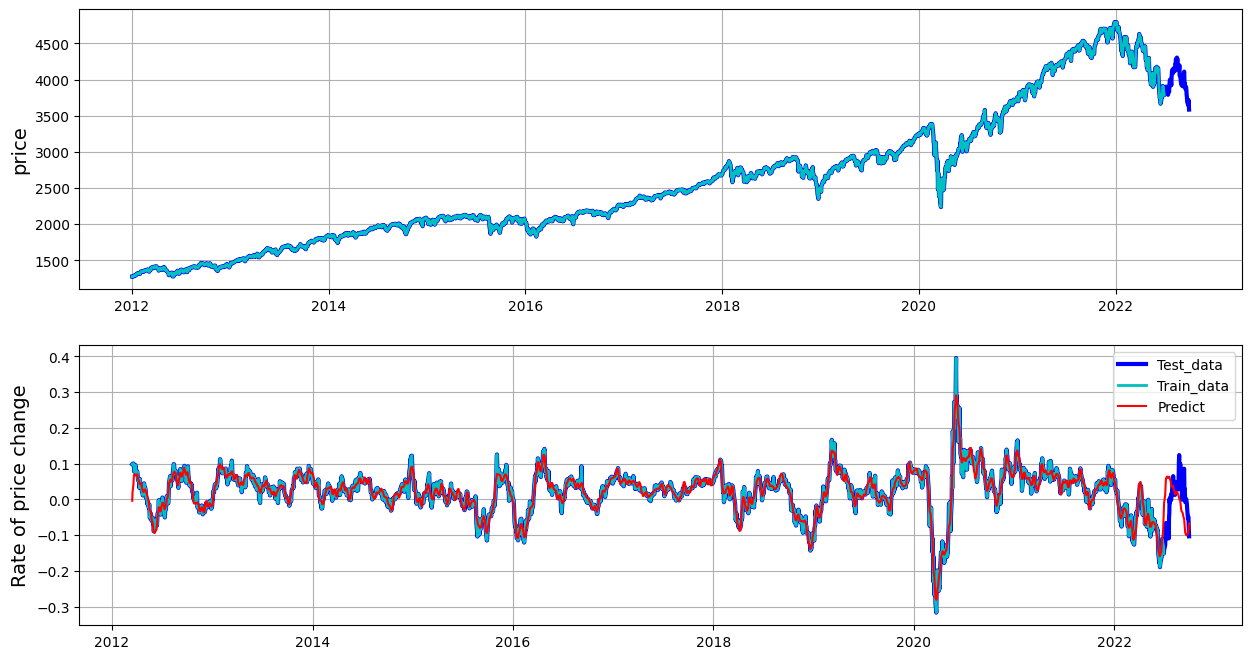

2527
DatetimeIndex(['2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31',
               ...
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=178, freq=None)
DatetimeIndex(['2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31',
               ...
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=178, freq=None)


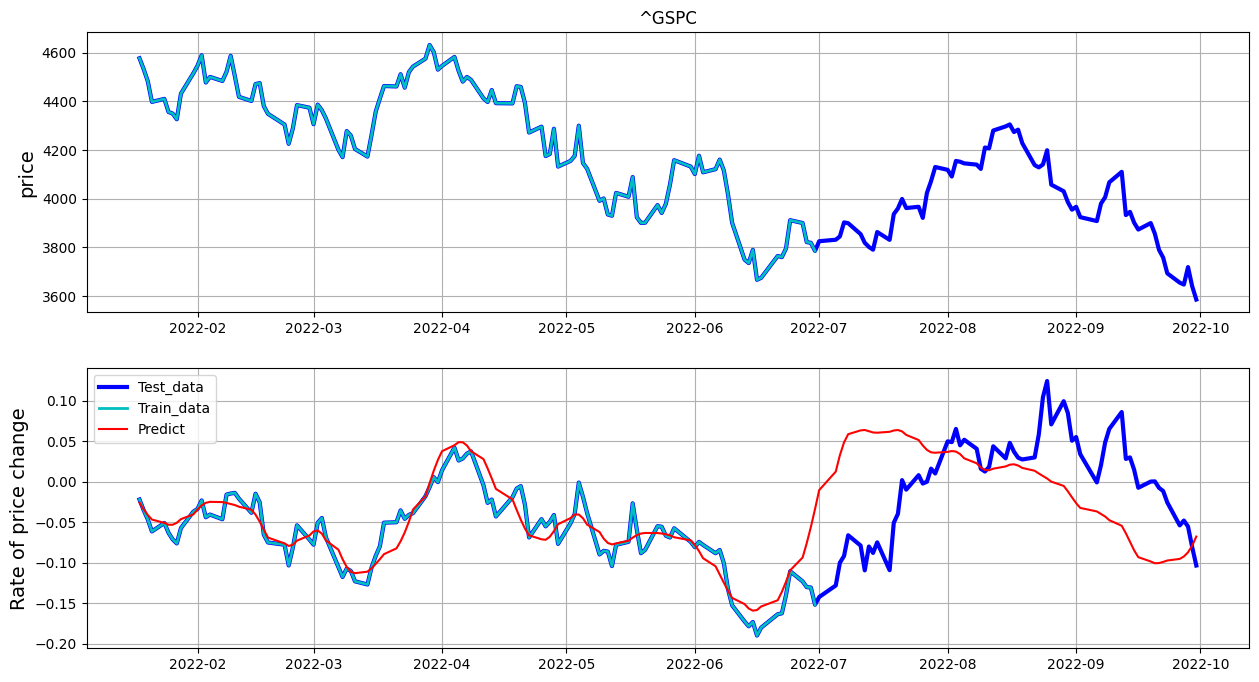

In [5]:
from signal import signal
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


def ROC_(data, n_ROC):
    N = data['Close'].diff(n_ROC)
    D = data['Close'].shift(n_ROC)
    ROC = pd.Series(N/D, name='Rate of Change')
    data = data.join(ROC)
    data = data.dropna()
    return data


def fourierExtrapolation(x, n_predict, n_harm):
    # fft process
    n_x = x.size
    n_harm = n_harm                 # number of harmonics in model
    t = np.arange(0, n_x)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n_x,d=1)

    mask = np.where(f >= 0)
    print(mask)
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 6))
    axes[0].plot(f[mask], abs(x_freqdom[mask]), label="x_freqdom")
    axes[0].set_xlabel("frequence", fontsize=14)
    axes[1].plot(1/f[mask], abs(x_freqdom[mask]), label="x_freqdom")
    axes[1].set_xlabel("period(Day)", fontsize=14)
    pl.legend()
    plt.tight_layout()
    plt.show()


    # set index
    indexes = list(range(n_x))                             # frequencies
    # indexes.sort(key = lambda i: np.absolute(f[i]))      # sort indexes by frequency, lower -> higher
    indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))  # sort indexes by amplitude, lower -> higher
    indexes.reverse()                                      # sort indexes by amplitudes, higher -> lower

    # restore signal
    t = np.arange(0, n_x + n_predict)
    restored_sig = np.zeros(t.size)
    count = 0
    for i in indexes[:1 + n_harm * 2]:                         # 因frequence有負對稱
        ampli = np.absolute(x_freqdom[i]) / n_x                # amplitude
        phase = np.angle(x_freqdom[i])                         # phase
        signal = ampli * np.cos(2 * np.pi * f[i] * t + phase)  # restore signal
        restored_sig += signal

        # draw signals
        if (count <= 10 or count >= (n_harm * 2 -2)): 
            if(count % 2 == 0):
                if (abs(f[i]) != 0):
                    print('Period : ', 1/abs(f[i]), '(Days)')
                num = int(count/2)
                sig_num = 'signal_' + str(num) 
                sig_period = 'Period : ' + str( 1/abs(f[i])) + '(Days)'
                fig, axes = plt.subplots(2, 1, figsize=(12, 6))
                axes[0].plot(signal, 'b')
                axes[0].set_xlabel(sig_period)
                axes[1].plot(restored_sig, 'r',label = 'restored_sig')
                axes[0].set_title(sig_num)
                pl.legend()
                plt.tight_layout()
                plt.show()
        count += 1

    return restored_sig + p[0] * t


def main():
    # set
    n_ROC = 50
    n_harm = 100
    date_0 = '2012-01-01'
    date_1 = '2022-07-01'
    stock = "^GSPC"

    # download data period
    data = yf.Ticker(stock).history(start=date_0, end=date_1)
    price = data['Close']
    data_ROC = yf.Ticker(stock).history(start=date_0, end=date_1)
    data_ROC = pd.DataFrame(data_ROC)
    n_ROC = n_ROC
    ROC_Nifty = ROC_(data_ROC, n_ROC)
    ROC = ROC_Nifty['Rate of Change']
    x = np.array(ROC)

    # set test data period
    date_2 = '2022-10-01'
    data_2 = yf.Ticker(stock).history(start=date_0, end=date_2)
    price_2 = data_2['Close']
    data_ROC_2 = pd.DataFrame(data_2)
    ROC_Nifty_2 = ROC_(data_ROC_2, n_ROC)
    ROC_2 = ROC_Nifty_2['Rate of Change']
    x_2 = np.array(ROC_2)

    # set predict options
    n_predict = price_2.size - price.size
    n_harm = n_harm  # number of haromnics in model
    extrapolation = fourierExtrapolation(x, n_predict, n_harm)

    # draw plot
    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    axes[0].plot(price_2.index, price_2, 'b', linewidth=3, label='Test_data')
    axes[0].plot(price.index, price, 'c', linewidth=2, label='Train_data')
    axes[0].set_ylabel("price", fontsize=14)
    axes[0].grid(True)
    axes[1].plot(ROC_2.index, x_2, 'b', linewidth=3, label='Test_data')
    axes[1].plot(ROC.index, x, 'c', linewidth=2, label='Train_data')
    axes[1].plot(ROC_Nifty_2.index, extrapolation, 'r', label='Predict')
    axes[1].grid(True)
    axes[1].set_ylabel("Rate of price change", fontsize=14)
    pl.legend()
    plt.show()

    tail_data = ROC_2.size - n_predict*2
    tail_data_2 = tail_data - n_ROC
    print(tail_data)
    print(price_2[tail_data:].index)
    print(ROC_2[tail_data_2:].index)
    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    axes[0].plot(price_2[tail_data:].index, price_2[tail_data:], 'b', linewidth=3, label='Test_data')
    axes[0].plot(price.index[tail_data:], price[tail_data:], 'c', linewidth=2, label='Train_data')
    axes[0].set_ylabel("price", fontsize=14)
    axes[0].grid(True)
    axes[1].plot(ROC_2[tail_data_2:].index, x_2[tail_data_2:], 'b', linewidth=3, label='Test_data')
    axes[1].plot(ROC[tail_data_2:].index, x[tail_data_2:], 'c', linewidth=2, label='Train_data')
    axes[1].plot(ROC_2[tail_data_2:].index, extrapolation[tail_data_2:], 'r', label='Predict')
    axes[1].grid(True)
    axes[1].set_ylabel("Rate of price change", fontsize=14)
    axes[0].set_title(stock)
    pl.legend()
    plt.show()
    
if __name__ == "__main__":
    main()
